## Validación Cruzada

In [3]:
# Importando las bibliotecas
import numpy as np
# Para realizar validación cruzada
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm
# Para hacer una división entre data de training y test
from sklearn.cross_validation import train_test_split

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

print(iris.data.shape, iris.target.shape)

(150, 4) (150,)


In [5]:
# Dividiendo en data de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)
print("Training")
print(X_train.shape, y_train.shape)
print("Test")
print(X_test.shape, y_test.shape)

Training
(120, 4) (120,)
Test
(30, 4) (30,)


In [6]:
# Probando un clasificador
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [9]:
# Ejecutando validación cruzada
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())
print(scores.std())

[ 0.92307692  1.          0.84615385  1.          1.          1.          1.
  0.81818182  1.          0.9       ]
0.948741258741
0.0680948342401


#### Ejecución de todas las etapas hasta el entrenamiento del clasificador

In [10]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_std, y_train)
X_test_std = scaler.transform(X_test)
clf.score(X_test_std, y_test)  

1.0

#### Podemos crear un pipeline para que se ejecute todo sobre los datos

In [11]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)

[ 0.92        0.88        1.          1.          0.95454545]


### Otra forma de hacer validación cruzada

In [10]:
from sklearn.model_selection import cross_validate
scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=5, return_train_score=True)
scores.keys()

dict_keys(['test_recall_macro', 'train_precision_macro', 'score_time', 'fit_time', 'test_precision_macro', 'train_recall_macro'])

In [17]:
print("Macro Precision: " , scores['test_precision_macro'])
print("Media: " , np.mean(scores['test_precision_macro']))
print("Desviacion Estandar: " , np.std(scores['test_precision_macro']))

Macro Precision:  [ 0.96666667  0.93333333  1.          0.96666667  0.96296296]
Media:  0.965925925926
Desviacion Estandar:  0.0211338409151


## Encontrando los mejores hiperparámetros

### GridsearchCV

In [29]:
# Importando la biblioteca GridsearchCV
from sklearn import grid_search

# Definiendo el espacio de búsqueda de nuestro algoritmo
parameters = {
'C': [0.1, 1, 10, 100],
'kernel': ['linear','rbf'],
'gamma' : 10.0**-np.arange(1,4)
}

clf = svm.SVC(random_state=0)

#score = 'accuracy' #Pasando como texto
#Creando un scorer
from sklearn.metrics import make_scorer, accuracy_score
accuracy_scorer = make_scorer(accuracy_score)
gridCV = grid_search.GridSearchCV(clf, parameters, scoring=accuracy_scorer, cv = 5) #
gridCV.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': array([ 0.1  ,  0.01 ,  0.001]), 'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(accuracy_score), verbose=0)

In [30]:
print("Mejor exactitud: ", gridCV.best_score_)
print("Resultados parciales: ", gridCV.grid_scores_)
print("Mejor conjunto de parámetros: ", gridCV.best_params_)

Mejor exactitud:  0.9666666666666667
Resultados parciales:  [mean: 0.95000, std: 0.02004, params: {'gamma': 0.10000000000000001, 'kernel': 'linear', 'C': 0.1}, mean: 0.91667, std: 0.03022, params: {'gamma': 0.10000000000000001, 'kernel': 'rbf', 'C': 0.1}, mean: 0.95000, std: 0.02004, params: {'gamma': 0.01, 'kernel': 'linear', 'C': 0.1}, mean: 0.69167, std: 0.01360, params: {'gamma': 0.01, 'kernel': 'rbf', 'C': 0.1}, mean: 0.95000, std: 0.02004, params: {'gamma': 0.001, 'kernel': 'linear', 'C': 0.1}, mean: 0.36667, std: 0.00688, params: {'gamma': 0.001, 'kernel': 'rbf', 'C': 0.1}, mean: 0.95833, std: 0.02539, params: {'gamma': 0.10000000000000001, 'kernel': 'linear', 'C': 1}, mean: 0.95833, std: 0.02885, params: {'gamma': 0.10000000000000001, 'kernel': 'rbf', 'C': 1}, mean: 0.95833, std: 0.02539, params: {'gamma': 0.01, 'kernel': 'linear', 'C': 1}, mean: 0.93333, std: 0.02094, params: {'gamma': 0.01, 'kernel': 'rbf', 'C': 1}, mean: 0.95833, std: 0.02539, params: {'gamma': 0.001, 'kerne

### Usando el clasificador

In [36]:
#Ejecutando el mejor modelo
pred_test = gridCV.predict(X_test)

from sklearn.metrics import classification_report
classes = ['0', '1','2']
print(classification_report(y_test, pred_test, target_names=classes))
print(accuracy_score(y_test,pred_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        30

1.0


#### Visualizando la matriz de confusión

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_test)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

## Visualizando los clasificadores y los hiperparámetros

[  1.00000000e-10   1.29154967e-09   1.66810054e-08   2.15443469e-07
   2.78255940e-06   3.59381366e-05   4.64158883e-04   5.99484250e-03
   7.74263683e-02   1.00000000e+00]
1e-10 - [ 0.36585366  0.375       0.35897436]
1.29154966501e-09 - [ 0.36585366  0.375       0.35897436]
1.6681005372e-08 - [ 0.36585366  0.375       0.35897436]
2.15443469003e-07 - [ 0.36585366  0.375       0.35897436]
2.78255940221e-06 - [ 0.36585366  0.375       0.35897436]
3.5938136638e-05 - [ 0.73170732  0.85        0.82051282]
0.000464158883361 - [ 0.87804878  0.975       0.92307692]
0.00599484250319 - [ 0.90243902  1.          0.92307692]
0.0774263682681 - [ 0.85365854  1.          0.92307692]
1.0 - [ 0.95121951  1.          0.92307692]


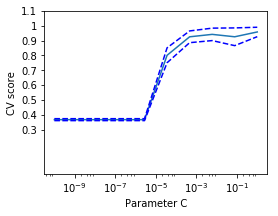

In [38]:
svc = svm.SVC(kernel='poly')
C_s = np.logspace(-10, 0, 10)
scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X_train, y_train)
    print(str(C) + " - " + str(this_scores))
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Do the plotting
import matplotlib.pyplot as plt
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

### Curva de Validación

In [12]:
# Importando el método 
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', svm.SVC(kernel='linear', random_state=1))])

In [13]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, val_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train, param_name='clf__C',param_range=param_range, cv=10)

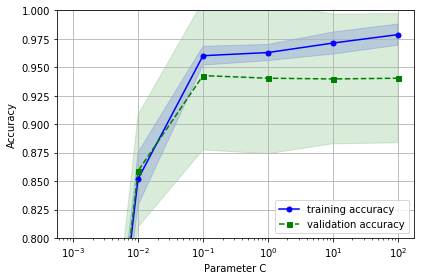

In [29]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(test_scores, axis=1)
val_std = np.std(test_scores, axis=1)

import matplotlib.pyplot as plt
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()

### Curva de Aprendizaje

In [30]:
# Importando Learning Curve
from sklearn.model_selection import learning_curve

In [32]:
train_sizes, train_scores, val_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

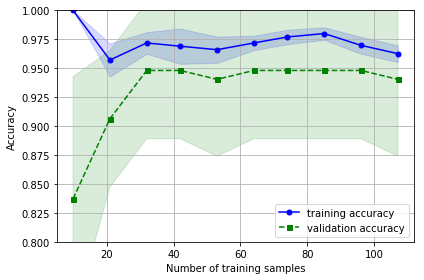

In [33]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 val_mean + val_std,
                 val_mean - val_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()